In [5]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_validate
from sklearn import metrics
import seaborn as sns 
import pickle
from Functions import *

%matplotlib inline

In [6]:
#read in final dataset
file = '..\Data\Final_Data.csv'
df = pd.read_csv(file, index_col=0)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Code
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,Y,11,8,0,1.0,6,1,0,0,1
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,Y,23,8,1,6.0,3,5,1,4,1
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,Y,15,8,3,5.0,2,5,0,3,0
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,Y,11,8,3,13.0,5,8,7,5,0
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,Y,12,8,2,9.0,2,6,0,4,0


In [7]:
#create logistic regression
X = df[['TotalWorkingYears', 'MonthlyIncome', 'YearsSinceLastPromotion', 'TrainingTimesLastYear', 'YearsWithCurrManager']]
y = df.Gender_Code
crossval = log_reg(X, y, 10)
crossval

{'fit_time': array([0.25899839, 0.00700021, 0.00600386, 0.00699854, 0.00699925,
        0.00699878, 0.00599551, 0.00500011, 0.00700188, 0.00502396]),
 'score_time': array([0.00200152, 0.00200057, 0.00099182, 0.00099993, 0.00100017,
        0.00099897, 0.00100017, 0.00099993, 0.0009985 , 0.0019989 ]),
 'estimator': (LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none')),
 'test_score': array([0.59908884, 0.59908884, 0.59817352, 0.59817352, 0.59817352,
        0.59817352, 0.60045662, 0.60045662, 0.60045662, 0.60045662]),
 'train_score': array([0.59928988, 0.59928988, 0.59939148, 0.59939148, 0.59939148,
        0.59939148, 0.59913793, 0.59913793, 0.59913793, 0.59913793])}

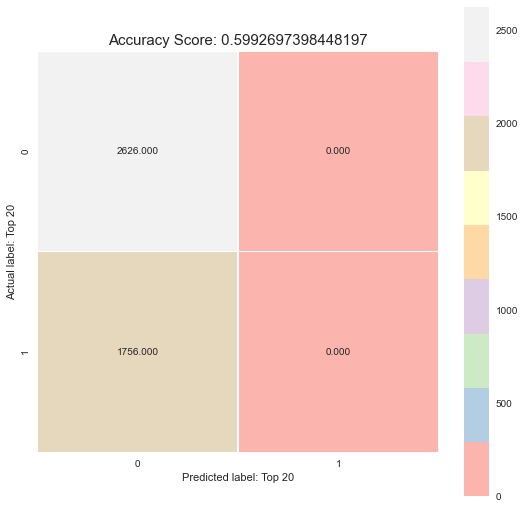

In [8]:
#chose model in array slot 0, since it appeared to have one of the highest scores
#display predictions vs actuals
estimator = crossval['estimator'][9]
accuracy_display(estimator, X, y, 'Top 20')

In [12]:
#create logistic regression, input GDP, output is_top20
X = df[['MonthlyIncome', 'PercentSalaryHike', 'YearsAtCompany', 'YearsSinceLastPromotion', 'JobLevel']]
y = df.Gender_Code
crossval = log_reg(X, y, 10)
crossval

{'fit_time': array([0.00799918, 0.00499916, 0.00599766, 0.00499964, 0.00701118,
        0.00705314, 0.00699806, 0.00500917, 0.00600266, 0.00499988]),
 'score_time': array([0.00300026, 0.00300503, 0.00200057, 0.00200033, 0.00200844,
        0.00198388, 0.00199986, 0.00099564, 0.00199771, 0.00200009]),
 'estimator': (LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none'),
  LogisticRegression(penalty='none')),
 'test_score': array([0.59908884, 0.59908884, 0.59817352, 0.59817352, 0.59817352,
        0.59817352, 0.60045662, 0.60045662, 0.60045662, 0.60045662]),
 'train_score': array([0.59928988, 0.59928988, 0.59939148, 0.59939148, 0.59939148,
        0.59939148, 0.59913793, 0.59913793, 0.59913793, 0.59913793])}

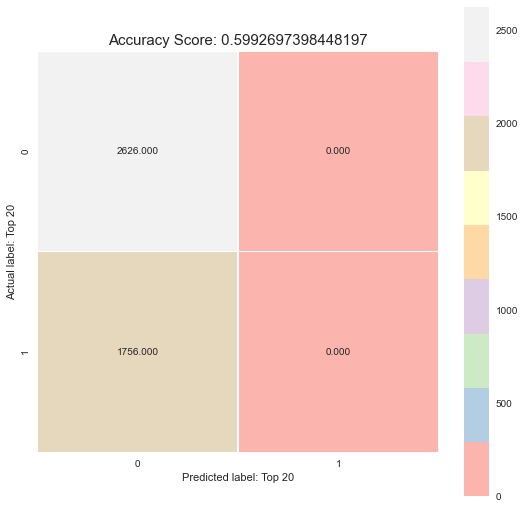

In [11]:
estimator = crossval['estimator'][9]
accuracy_display(estimator, X, y, 'Top 20')